**@author:** Dogan Can Demirbilek

**@brief:** Descriptive analysis on merged dataset and removing the most obvious outliers or post errors

In [54]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns

In [55]:
data = pd.read_excel('../data/data_merged.xlsx')
data.head(5)

,Unnamed: 0,Unnamed: 0.1,baslik,il,ilce,mahalle,fiyat,para_birimi,ilan_no,ilan_tarihi,...,renk,garanti,plaka_uyruk,kimden,takas,durumu,telefon,ilan_sahibi,submodel1,submodel2
0,0,0,"KONYA GENÇLER OTOMOTİV,DEN HATASIZ ÇOK TEMİZ A...",Konya,Karatay,Fevziçakmak Mah.,72500.00,TL,515571139,31 Aralık 2017,...,Gri,Hayır,Türkiye (TR) Plakalı,Galeriden,Evet,İkinci El,İş 0 (332) 342 49 79 0 (332) *** ** 79 Cep 0 (...,KONYA GENÇLER OTOMOTİV|Mehmet Uzar,NaN,NaN
1,1,1,TOKAY AUTO'DAN 177 BG AUDİ A4,İzmir,Gaziemir,Gazi Mah.,117500.00,TL,415570628,31 Aralık 2017,...,Beyaz,Evet,Türkiye (TR) Plakalı,Galeriden,Evet,İkinci El,İş 0 (232) 282 11 17 0 (232) *** ** 17 Cep 0 (...,|ALİ PEZKET,NaN,NaN
2,2,2,AVANTAJLI 2014 AUDİ A6 3.0TDİ QUATTRO-ORJİNAL ...,İstanbul,Bahçelievler,Yenibosna Merkez Mah.,249500.00,TL,483277370,31 Aralık 2017,...,Siyah,Hayır,Türkiye (TR) Plakalı,Galeriden,Evet,İkinci El,İş 0 (212) 411 17 00 0 (212) *** ** 00 Cep 0 (...,Altur Turizm|Mehmet Karakuş,NaN,NaN
3,3,3,Doğuş çıkışlı Orijinal a4 160lık /led xenon far,Muğla,Marmaris,Armutalan Bld. (Merkez Mah.),92500.00,TL,463504189,31 Aralık 2017,...,Siyah,Hayır,Türkiye (TR) Plakalı,Sahibinden,Hayır,İkinci El,Cep 0 (542) 295 57 21 0 (542) *** ** 21,|Hasan Uzun,NaN,NaN
4,4,4,Kışa Hazır Quattro A6,Afyonkarahisar,Emirdağ,Yeni Mah.,47000.00,TL,448086647,31 Aralık 2017,...,Gri,Hayır,Türkiye (TR) Plakalı,Sahibinden,Hayır,İkinci El,Ev 0 (272) 442 60 88 0 (272) *** ** 88 Cep 0 (...,|Muzaffer Gümüşel,NaN,NaN


In [56]:
data.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'baslik', 'il', 'ilce', 'mahalle',
       'fiyat', 'para_birimi', 'ilan_no', 'ilan_tarihi', 'marka', 'seri',
       'model', 'yil', 'yakit', 'vites', 'km', 'kasa_tipi', 'motor_gucu_hp',
       'motor_hacmi_cc', 'cekis', 'renk', 'garanti', 'plaka_uyruk', 'kimden',
       'takas', 'durumu', 'telefon', 'ilan_sahibi', 'submodel1', 'submodel2'],
      dtype='object')

In [57]:
#silinecek kolonlar
silinecekler_liste = ['Unnamed: 0','Unnamed: 0.1','baslik','ilce','mahalle','para_birimi','ilan_no','ilan_tarihi','telefon','ilan_sahibi']
for i in silinecekler_liste:
    del data[i]

In [58]:
#data describe kısmındaki e'li görünümleri düzeltmek için
pd.options.display.float_format = "{:.2f}".format

In [59]:
data.describe()

,fiyat,yil,km,motor_gucu_hp,motor_hacmi_cc
count,264553.00,264553.00,264553.00,264553.00,264553.00
mean,66059.69,2007.82,131824.85,113.11,1579.05
std,156419.61,14.30,101328.45,47.93,391.55
min,1000.00,90.00,0.00,39.00,698.00
25%,27500.00,2004.00,61500.00,85.00,1396.00
50%,44500.00,2010.00,120500.00,102.00,1560.00
75%,72500.00,2014.00,188000.00,125.00,1598.00
max,45500000.00,2816.00,9999999.00,669.00,7011.00


In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264553 entries, 0 to 264552
Data columns (total 21 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   il              264553 non-null  object 
 1   fiyat           264553 non-null  float64
 2   marka           264553 non-null  object 
 3   seri            264553 non-null  object 
 4   model           264553 non-null  object 
 5   yil             264553 non-null  int64  
 6   yakit           264553 non-null  object 
 7   vites           264553 non-null  object 
 8   km              264553 non-null  int64  
 9   kasa_tipi       264553 non-null  object 
 10  motor_gucu_hp   264553 non-null  int64  
 11  motor_hacmi_cc  264553 non-null  int64  
 12  cekis           264553 non-null  object 
 13  renk            264553 non-null  object 
 14  garanti         264553 non-null  object 
 15  plaka_uyruk     264553 non-null  object 
 16  kimden          264553 non-null  object 
 17  takas     

(-2283546.3908050875, 47784546.39080508, 0.0, 1.150997226361815e-06)

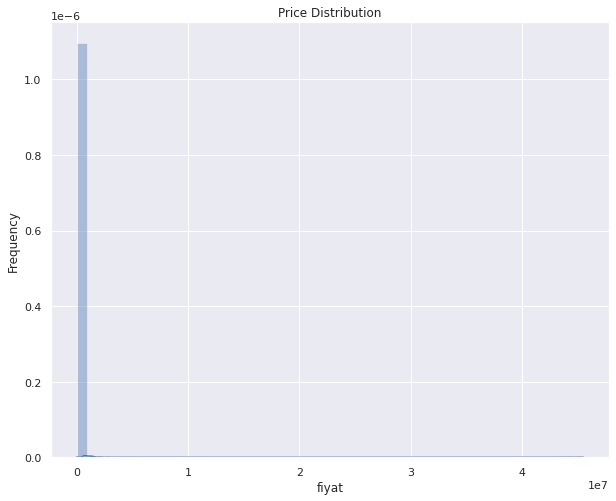

In [61]:
plt.figure(figsize= (10,8))
plt.title('Price Distribution')
plt.ylabel('Frequency')
sns.distplot(data['fiyat'])
plt.axis('tight')

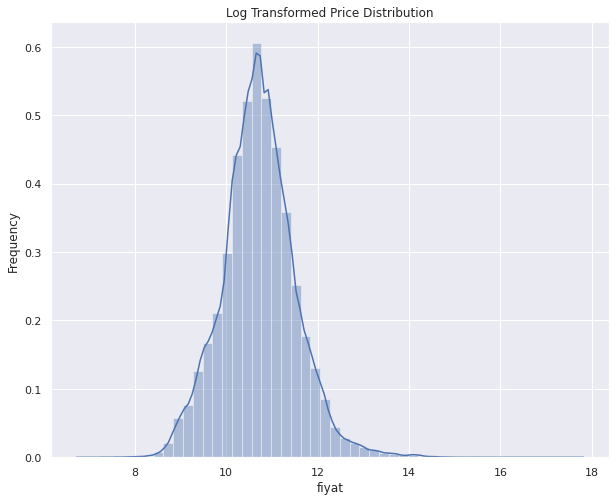

In [62]:
plt.figure(figsize = (10,8))
plt.title('Log Transformed Price Distribution')
plt.ylabel('Frequency')
sns.distplot(np.log1p(data['fiyat']))

## Numerical Variables

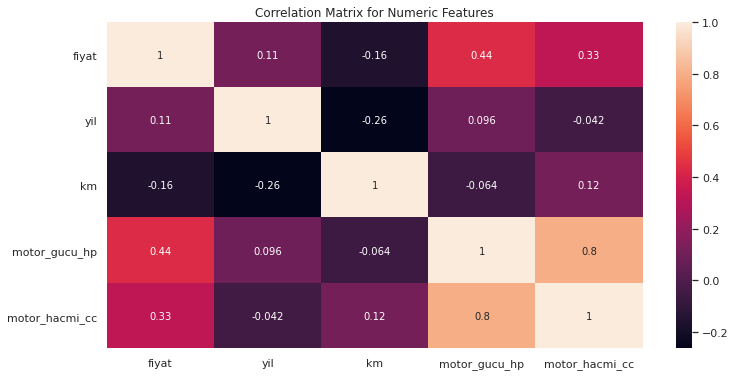

In [63]:
#Üzerine biraz düşünülmesi gerek
plt.figure(figsize = (12,6))
plt.title('Correlation Matrix for Numeric Features')
sns.heatmap(data.corr(), annot=True)

[(39.0, 669.0), (698.0, 7011.0)]

<Figure size 432x288 with 0 Axes>

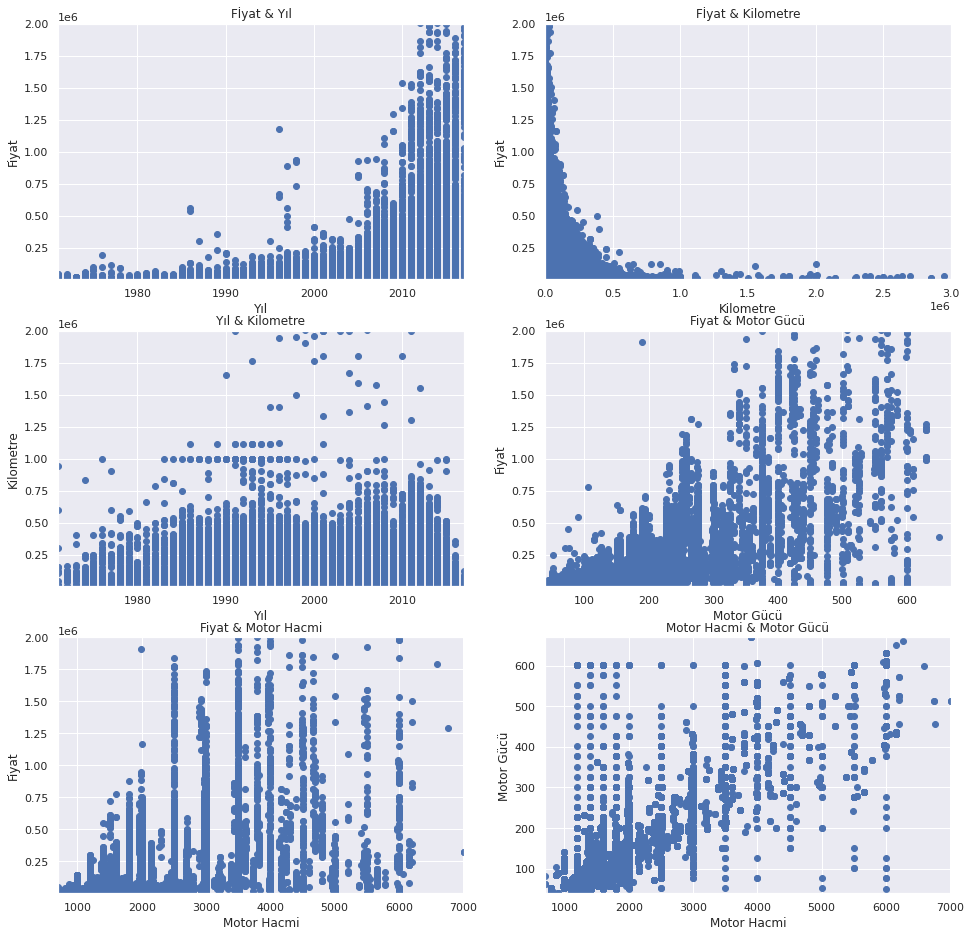

In [64]:
plt.figure()
f ,axarr = plt.subplots(3,2,figsize = (16,16))
fiyat = data.fiyat.values
axarr[0,0].scatter(data.yil.values,fiyat)
axarr[0,0].set_title('Fİyat & Yıl')
axarr[0,0].set_xlabel('Yıl')
axarr[0,0].set_ylabel('Fiyat')
axarr[0,0].set(xlim = (1971,2017))
axarr[0,0].set(ylim = (1555,2000000))
axarr[0,1].scatter(data.km.values,fiyat)
axarr[0,1].set_title('Fİyat & Kilometre')
axarr[0,1].set_xlabel('Kilometre')
axarr[0,1].set_ylabel('Fiyat')
axarr[0,1].set(xlim = (0,3000000))
axarr[0,1].set(ylim = (1555,2000000))
axarr[1,0].scatter(data.yil,data.km)
axarr[1,0].set_title('Yıl & Kilometre')
axarr[1,0].set_xlabel('Yıl')
axarr[1,0].set_ylabel('Kilometre')
axarr[1,0].set(xlim = (1971,2017))
axarr[1,0].set(ylim = (1555,2000000))
axarr[1,1].scatter(data.motor_gucu_hp.values,fiyat)
axarr[1,1].set_title('Fiyat & Motor Gücü')
axarr[1,1].set_xlabel('Motor Gücü')
axarr[1,1].set_ylabel('Fiyat')
axarr[1,1].set(xlim = (39,669))
axarr[1,1].set(ylim = (1555,2000000))
axarr[2,0].scatter(data.motor_hacmi_cc.values,fiyat)
axarr[2,0].set_title('Fiyat & Motor Hacmi')
axarr[2,0].set_xlabel('Motor Hacmi')
axarr[2,0].set_ylabel('Fiyat')
axarr[2,0].set(xlim = (698,7011))
axarr[2,0].set(ylim = (1555,2000000))
axarr[2,1].scatter(data.motor_hacmi_cc,data.motor_gucu_hp)
axarr[2,1].set_title('Motor Hacmi & Motor Gücü')
axarr[2,1].set_xlabel('Motor Hacmi')
axarr[2,1].set_ylabel('Motor Gücü')
axarr[2,1].set(xlim = (698,7011),ylim = (39,669))

## Categorical Features

In [65]:
print(data.select_dtypes(include=['object']).columns.values)

['il' 'marka' 'seri' 'model' 'yakit' 'vites' 'kasa_tipi' 'cekis' 'renk'
 'garanti' 'plaka_uyruk' 'kimden' 'takas' 'durumu' 'submodel1' 'submodel2']


**İl**

In [66]:
iller_ort = data.groupby('il',as_index=False)['fiyat'].mean()
print(iller_ort.sort_values(['fiyat'],ascending=False)[:10])
iller_std = data.groupby('il')['fiyat'].std()
print("\n\n",iller_std.sort_values(ascending=False)[:10])

            il     fiyat
15     Belçika 331420.00
78    İstanbul  90826.01
23  Diyarbakır  74042.29
33     Hakkari  73199.15
52      Mardin  71287.15
53      Mersin  67800.64
30   Gaziantep  67476.18
71         Van  67390.07
13      Batman  67222.70
68     Trabzon  66114.98


 il
Aydın        511413.56
Ankara       277291.03
İzmir        254390.99
İstanbul     166392.61
Mersin       107282.76
Trabzon       78681.26
Antalya       78644.44
Çanakkale     76282.04
Gaziantep     74952.13
Diyarbakır    74597.48
Name: fiyat, dtype: float64


* **Marka**

In [67]:
marka_ort = data.groupby('marka')['fiyat'].mean()
print(marka_ort.sort_values(ascending=False))
marka_std = data.groupby('marka')['fiyat'].std()
print("\n\n",marka_std.sort_values(ascending=False)[:10])

marka
Ferrari           1319502.20
Bentley           1307385.19
Porsche            631141.97
Maserati           566839.74
Jaguar             165270.40
Mercedes - Benz    149965.57
BMW                125160.92
Audi               124252.88
Volvo               82387.53
Mini                74842.37
Chrysler            69893.91
Volkswagen          67557.19
Skoda               61829.25
Seat                56146.14
Subaru              52528.23
Lancia              52460.66
Honda               51002.74
Kia                 49026.09
Ford                48320.61
Chevrolet           47989.72
Toyota              46972.91
Alfa Romeo          46649.27
Smart               46008.20
Dacia               45398.75
Citroën             43560.08
Opel                42987.09
Nissan              42917.79
Hyundai             40574.82
Renault             37786.55
Peugeot             37199.14
Mazda               33327.79
Suzuki              32333.48
Fiat                31522.18
Tata                18489.88
Rover   

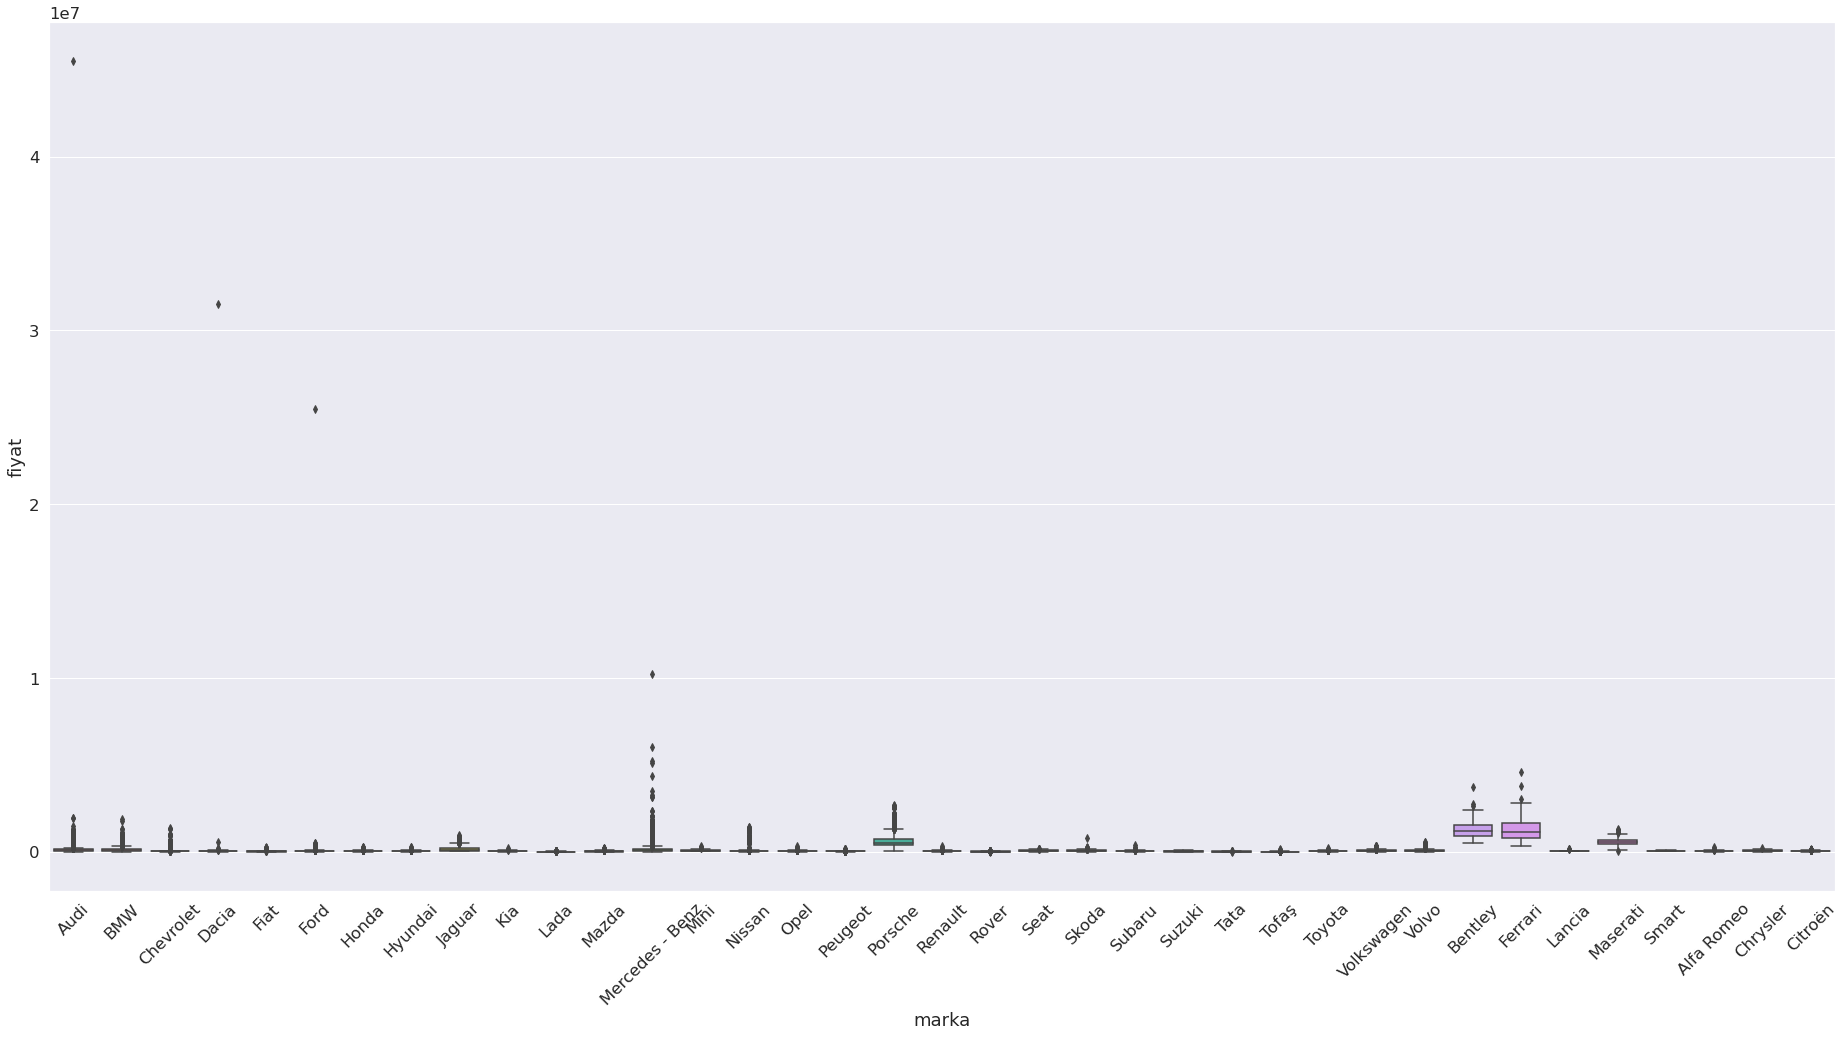

In [68]:
sns.set(font_scale = 1.50)
plt.figure(figsize = (32,16))
sns.boxplot(x = 'marka', y = 'fiyat', data = data)
xt = plt.xticks(rotation=45)

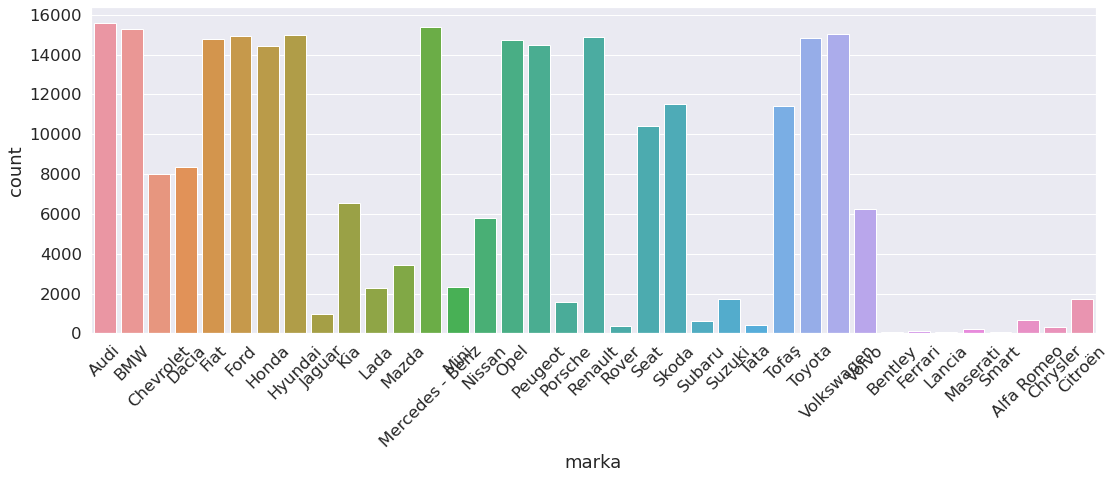

In [69]:
plt.figure(figsize = (18,6))
sns.countplot(x = 'marka',data = data)
xt = plt.xticks(rotation=45)

* **Yakıt**

In [70]:
yakıt_ort = data.groupby('yakit',as_index = False)['fiyat'].mean()
yakıt_ort.sort_values(ascending=False,by=['fiyat'])

,yakit,fiyat
4,Hybrid,193618.95
0,Benzin,91715.78
2,Dizel,81399.85
3,Elektrik,54500.00
1,Benzin & LPG,30532.24


In [71]:
yakıt_std = data.groupby('yakit')['fiyat'].std()
yakıt_std.sort_values(ascending=False)

yakit
Hybrid         302906.78
Benzin         207166.72
Benzin & LPG   172107.88
Dizel           86824.20
Elektrik             nan
Name: fiyat, dtype: float64

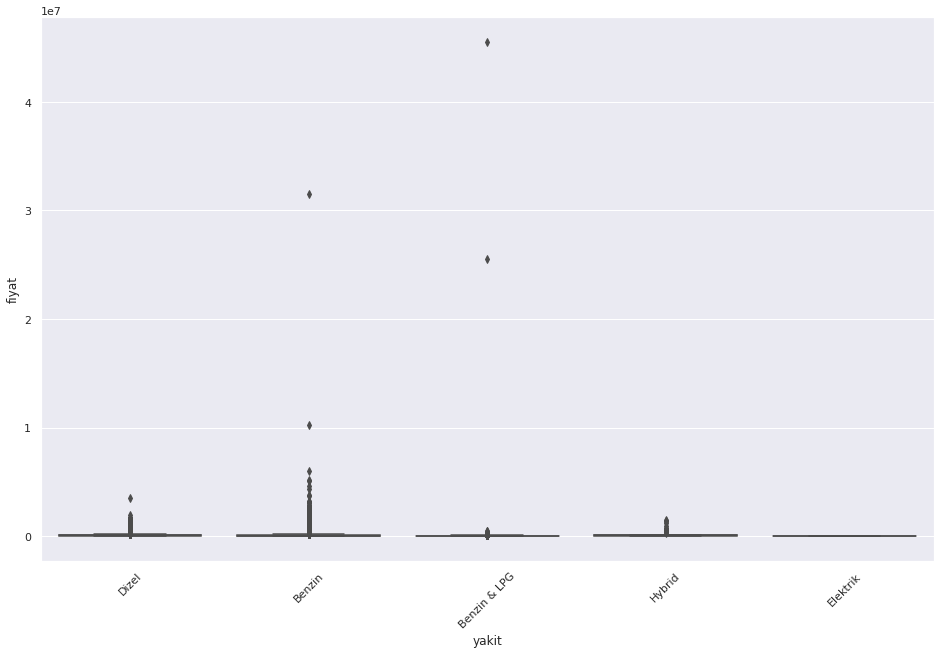

In [72]:
sns.set(font_scale = 1)
plt.figure(figsize = (16,10))
sns.boxplot(x = 'yakit', y = 'fiyat', data = data)
xt = plt.xticks(rotation=45)

In [73]:
data[data["yakit"]=="Hybrid"].sort_values(ascending=False,by=['fiyat'])

,il,fiyat,marka,seri,model,yil,yakit,vites,km,kasa_tipi,...,motor_hacmi_cc,cekis,renk,garanti,plaka_uyruk,kimden,takas,durumu,submodel1,submodel2
85284,İstanbul,1455390.00,Porsche,Panamera,Panamera 4 E-Hybrid,2017,Hybrid,Otomatik,0,Hatchback 5 kapı,...,2894,4WD,Beyaz,Evet,Türkiye (TR) Plakalı,Galeriden,Evet,Sıfır,NaN,NaN
120334,İstanbul,1415220.00,Porsche,Panamera,Panamera 4 E-Hybrid,2017,Hybrid,Otomatik,0,Hatchback 5 kapı,...,2894,4WD,Beyaz,Evet,Türkiye (TR) Plakalı,Galeriden,Evet,Sıfır,NaN,NaN
149273,İstanbul,1380160.00,Porsche,Panamera,Panamera 4 E-Hybrid,2017,Hybrid,Otomatik,0,Hatchback 5 kapı,...,2894,4WD,Beyaz,Evet,Türkiye (TR) Plakalı,Galeriden,Evet,Sıfır,NaN,NaN
133826,İstanbul,1166780.00,BMW,7 Serisi,740e xDrive Long Executive Lounge,2016,Hybrid,Yarı Otomatik,18000,Sedan,...,1998,4WD,Siyah,Evet,Türkiye (TR) Plakalı,Sahibinden,Hayır,İkinci El,NaN,NaN
85129,İstanbul,890190.00,Porsche,Panamera,Panamera S Hybrid,2013,Hybrid,Yarı Otomatik,34000,Hatchback 5 kapı,...,2995,Arkadan,Beyaz,Evet,Türkiye (TR) Plakalı,Galeriden,Evet,İkinci El,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70781,İstanbul,40500.00,Honda,Civic,1.4 Hybrid,2008,Hybrid,Yarı Otomatik,144000,Sedan,...,1339,Önden,Siyah,Hayır,Türkiye (TR) Plakalı,Sahibinden,Hayır,İkinci El,NaN,NaN
9467,İzmir,39900.00,Honda,Civic,1.4 Hybrid,2009,Hybrid,Yarı Otomatik,78000,Sedan,...,1339,Önden,Siyah,Hayır,Türkiye (TR) Plakalı,Galeriden,Evet,İkinci El,NaN,NaN
193988,İstanbul,38950.00,Honda,Civic,1.4 Hybrid,2007,Hybrid,Yarı Otomatik,175000,Sedan,...,1339,Önden,Siyah,Hayır,Türkiye (TR) Plakalı,Sahibinden,Evet,İkinci El,NaN,NaN
8771,İstanbul,38500.00,Honda,Civic,1.4 Hybrid,2008,Hybrid,Yarı Otomatik,175000,Sedan,...,1339,Önden,Siyah,Hayır,Türkiye (TR) Plakalı,Sahibinden,Hayır,İkinci El,NaN,NaN


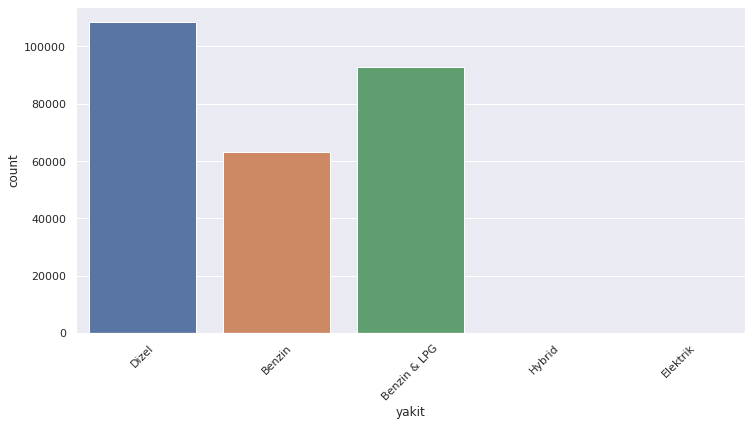

In [74]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'yakit',data = data)
xt = plt.xticks(rotation=45)

* **vites**

In [75]:
vites_ort = data.groupby('vites',as_index=False)['fiyat'].mean()
vites_ort.sort_values(ascending=False,by=['fiyat'])

,vites,fiyat
2,Yarı Otomatik,118435.98
1,Otomatik,94000.56
0,Manuel,36668.54


In [76]:
vites_std = data.groupby('vites')['fiyat'].std()
vites_std.sort_values(ascending=False)

vites
Otomatik        169555.38
Manuel          155229.61
Yarı Otomatik   133278.75
Name: fiyat, dtype: float64

In [77]:
data[data['vites']=='Yarı Otomatik'].sort_values(ascending=False,by=['fiyat'])[:100]

,il,fiyat,marka,seri,model,yil,yakit,vites,km,kasa_tipi,...,motor_hacmi_cc,cekis,renk,garanti,plaka_uyruk,kimden,takas,durumu,submodel1,submodel2
225506,İstanbul,10215000.00,Mercedes - Benz,Maybach S,S 600,2016,Benzin,Yarı Otomatik,0,Sedan,...,5980,Arkadan,Kahverengi,Evet,Türkiye (TR) Plakalı,Galeriden,Evet,Sıfır,NaN,NaN
115295,İstanbul,6022700.00,Mercedes - Benz,Maybach S,S 600,2017,Benzin,Yarı Otomatik,0,Sedan,...,5980,Arkadan,Siyah,Evet,Türkiye (TR) Plakalı,Galeriden,Evet,Sıfır,NaN,NaN
171249,İstanbul,5208750.00,Mercedes - Benz,S,S 600 600 L,2016,Benzin,Yarı Otomatik,0,Sedan,...,5980,Arkadan,Siyah,Evet,Türkiye (TR) Plakalı,Galeriden,Hayır,Sıfır,S 600,600 L
225507,İstanbul,5107500.00,Mercedes - Benz,S,S 600 600 L,2016,Benzin,Yarı Otomatik,0,Sedan,...,5980,Arkadan,Siyah,Evet,Türkiye (TR) Plakalı,Galeriden,Hayır,Sıfır,NaN,NaN
60613,İstanbul,3720900.00,Bentley,Mulsanne,6.75,2013,Benzin,Yarı Otomatik,1020,Sedan,...,6750,Arkadan,Siyah,Evet,Türkiye (TR) Plakalı,Galeriden,Evet,İkinci El,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197879,İstanbul,1430100.00,Mercedes - Benz,S,S 63 AMG,2015,Benzin,Yarı Otomatik,20004,Coupe,...,5461,4WD,Siyah,Evet,Türkiye (TR) Plakalı,Galeriden,Hayır,İkinci El,NaN,NaN
65976,İstanbul,1408290.00,Ferrari,458,Italia,2012,Benzin,Yarı Otomatik,16800,Coupe,...,4499,Arkadan,Siyah,Evet,Türkiye (TR) Plakalı,Galeriden,Evet,İkinci El,NaN,NaN
14396,İstanbul,1407400.00,Mercedes - Benz,AMG GT,4.0 S,2015,Benzin,Yarı Otomatik,990,Roadster,...,3982,Arkadan,Gri,Evet,Türkiye (TR) Plakalı,Galeriden,Evet,İkinci El,NaN,NaN
14508,İstanbul,1407400.00,Mercedes - Benz,AMG GT,4.0 S,2015,Benzin,Yarı Otomatik,990,Roadster,...,3982,Arkadan,Gri,Evet,Türkiye (TR) Plakalı,Galeriden,Evet,İkinci El,NaN,NaN


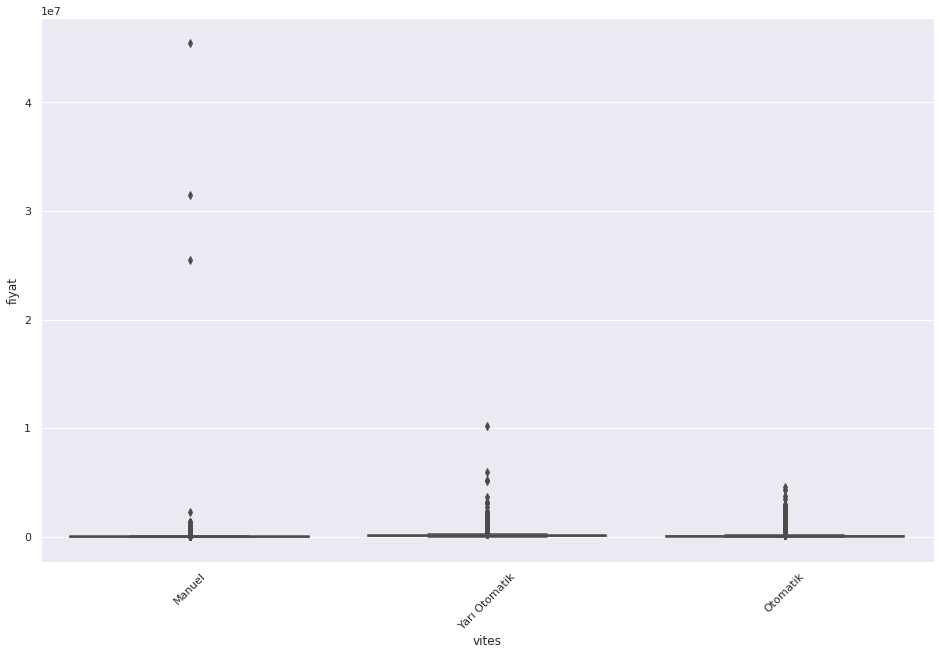

In [78]:
sns.set(font_scale = 1)
plt.figure(figsize = (16,10))
sns.boxplot(x = 'vites', y = 'fiyat', data = data)
xt = plt.xticks(rotation=45)

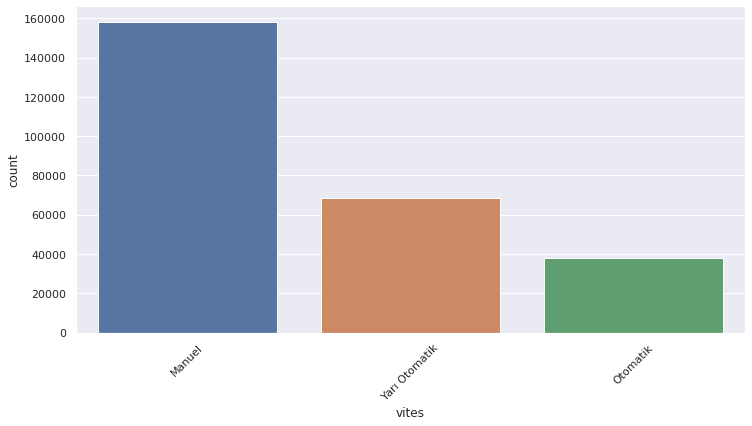

In [79]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'vites',data = data)
xt = plt.xticks(rotation=45)

* **Kasa Tipi**

In [80]:
data['kasa_tipi'].unique()

array(['Sedan', 'Hatchback 5 kapı', 'Hatchback 3 kapı', 'Coupe',
       'Station Wagon', 'Cabrio', 'Roadster', 'MPV', 'Crossover'],
      dtype=object)

In [81]:
kasatip_ort = data.groupby('kasa_tipi',as_index=False)['fiyat'].mean()
print(kasatip_ort.sort_values(['fiyat'],ascending=False))
kasatip_std = data.groupby('kasa_tipi')['fiyat'].std()
print("\n\n",kasatip_std.sort_values(ascending=False))

          kasa_tipi     fiyat
6          Roadster 258688.97
0            Cabrio 237880.83
1             Coupe 234379.71
2         Crossover  82651.85
7             Sedan  66748.04
4  Hatchback 5 kapı  53217.64
5               MPV  52297.21
8     Station Wagon  39299.69
3  Hatchback 3 kapı  38998.75


 kasa_tipi
Cabrio             341348.05
Roadster           326571.27
Coupe              325627.72
Sedan              163338.66
Hatchback 5 kapı   118839.45
Station Wagon       66513.44
Hatchback 3 kapı    40038.50
Crossover           28965.61
MPV                 24242.11
Name: fiyat, dtype: float64


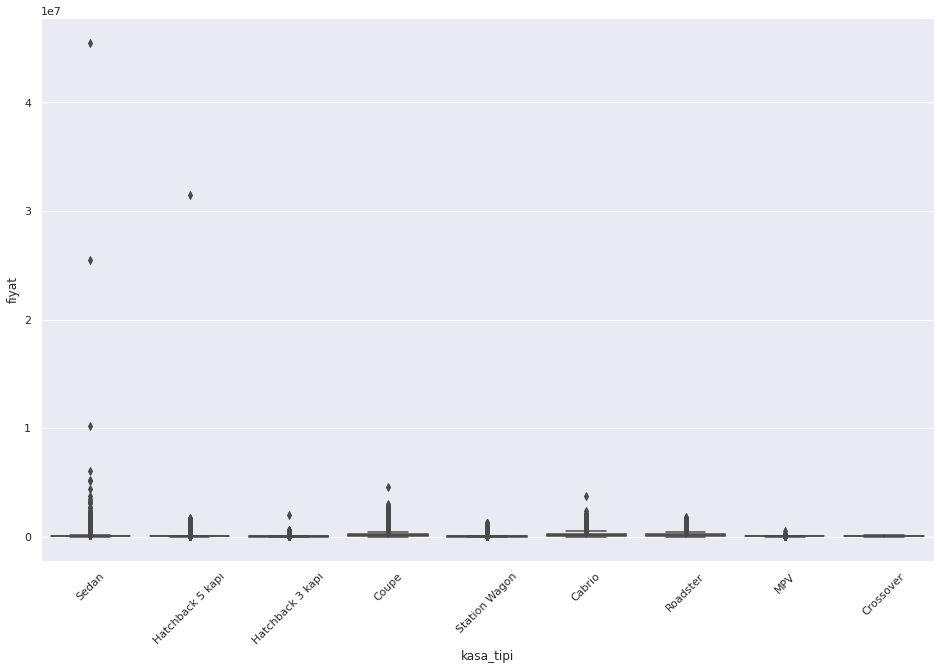

In [82]:
sns.set(font_scale = 1)
plt.figure(figsize = (16,10))
sns.boxplot(x = 'kasa_tipi', y = 'fiyat', data = data)
xt = plt.xticks(rotation=45)

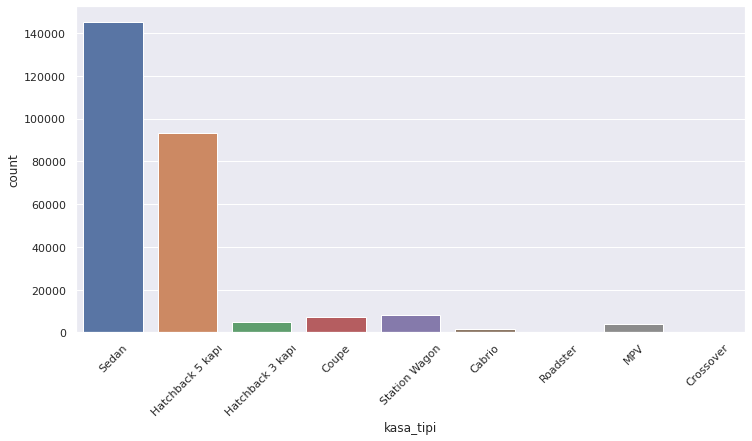

In [83]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'kasa_tipi',data = data)
xt = plt.xticks(rotation=45)

* **renk**

In [84]:
renk_ort = data.groupby('renk',as_index=False)['fiyat'].mean()
renk_ort.sort_values(['fiyat'],ascending=False)

,renk,fiyat
15,Turuncu,120161.76
13,Siyah,98142.70
3,Füme,75679.12
1,Beyaz,74677.07
6,Kahverengi,70747.02
4,Gri,56347.05
7,Kırmızı,52440.77
8,Lacivert,51501.79
9,Mavi,51488.00
12,Sarı,49800.95


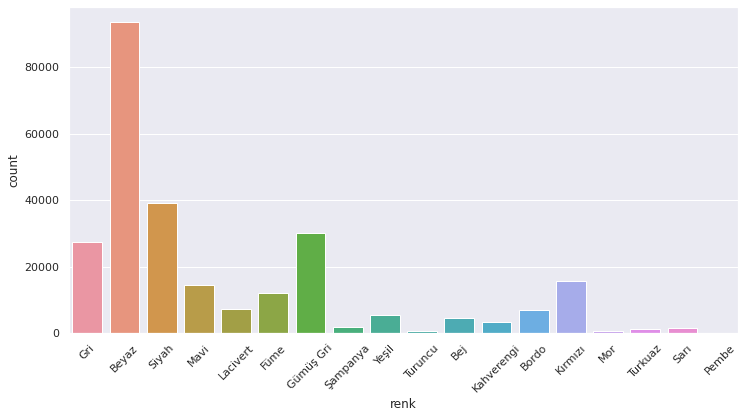

In [85]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'renk',data = data)
xt = plt.xticks(rotation=45)

* **Takas**

In [86]:
data['takas'].unique()

array(['Evet\xa0', 'Hayır\xa0'], dtype=object)

In [87]:
takas_ort = data.groupby('takas',as_index=False)['fiyat'].mean()
takas_ort

,takas,fiyat
0,Evet,71381.77
1,Hayır,59555.64


In [88]:
#Evet ve hayırları 1 ve 0'lara dönüştürme kodu
data.replace(to_replace='Evet\xa0',value=1,inplace=True)
data.replace(to_replace='Hayır\xa0',value=0,inplace=True)

In [89]:
data['takas']

0         1
1         1
2         1
3         0
4         0
         ..
264548    0
264549    1
264550    0
264551    0
264552    0
Name: takas, Length: 264553, dtype: int64

In [90]:
print(data.select_dtypes(include=['object']).columns.values)

['il' 'marka' 'seri' 'model' 'yakit' 'vites' 'kasa_tipi' 'cekis' 'renk'
 'garanti' 'plaka_uyruk' 'kimden' 'durumu' 'submodel1' 'submodel2']


In [91]:
data['garanti'].unique()

array(['Hayır', 'Evet'], dtype=object)

In [92]:
garanti_ort = data.groupby('garanti',as_index=False)['fiyat'].mean()
garanti_ort

,garanti,fiyat
0,Evet,101617.29
1,Hayır,52939.84


In [93]:
data.replace(to_replace='Evet',value=1,inplace=True)
data.replace(to_replace='Hayır',value=0,inplace=True)
data['garanti']

0         0
1         1
2         0
3         0
4         0
         ..
264548    0
264549    1
264550    1
264551    0
264552    0
Name: garanti, Length: 264553, dtype: int64

In [94]:
data['plaka_uyruk'].unique()

array(['Türkiye (TR) Plakalı', 'Yabancı Plakalı', 'Mavi (MA) Plakalı'],
      dtype=object)

In [95]:
data['kimden'].unique()

array(['Galeriden', 'Sahibinden'], dtype=object)

In [96]:
data['durumu'].unique()

array(['İkinci El\xa0', 'Sıfır\xa0'], dtype=object)

In [97]:
# removing potential outliers
data = data[(data.yil > 1990) & (data.yil < 2020)]
data = data[(data.motor_gucu_hp > 50) & (data.motor_gucu_hp < 500)]
data = data[(data.km < 700000)]

In [98]:
with pd.ExcelWriter('../data/data_merged_filtered.xlsx') as writer:
    data.to_excel(writer)